In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pingouin as pg

In [2]:
ratings = np.loadtxt("musicRatings.csv", delimiter=",")
ratings = ratings[:, :-1]
full_ratings = np.loadtxt("full_ratings.csv", delimiter=",")
full_ratings = full_ratings[:, :320]
num_song = 139

# Feature Selection Based on VIF

In [58]:
def getMaxIdx(data):
    return np.argmax([1/(1 - LinearRegression().fit(data[:, np.r_[:i, i+1:data.shape[1]]], data[:, i]).score(data[:, np.r_[:i, i+1:data.shape[1]]], data[:, i])) for i in range(data.shape[1])])

In [62]:
drop_col = []

while full_ratings.shape[1] > 139:
    col_idx = getMaxIdx(full_ratings)
    full_ratings = full_ratings[:, np.r_[:col_idx, col_idx+1:full_ratings.shape[1]]]
    drop_col.append(col_idx)
    print(col_idx)

194
178
178
195
148
190
232
181
140
57
188
244
138
101
245
21
121
179
216
202
68
119
176
296
102
54
130
211
22
227
126
105
187
2
29
142
3
118
40
41
152
101
115
113
163
58
40
53
29
2
117
26
147
137
1
109
207
114
188
34
179
215
110
200
27
212
49
142
35
106
190
48
86
172
25
158
179
170
7
99
115
110
61
120
226
175
87
176
98
115
197
145
137
17
53
48
73
181
24
36
116
150
36
125
35
188
174
103
2
42
7
16
36
116
63
67
144
10
101
71
123
84
133
94
143
79
20
167
170
190
25
175
11
66
129
62
146
107
3
110
151
8
16
116
21
25
76
94
69
28
67
132
70
141
130
113
71
1
54
67
41
97
15
124
11
132
112
13
8
103
93
78
51
5
38
52
113
90
114
78
13


In [84]:
music_lib = pd.read_excel('MusicTable.xlsx').iloc[:320, :8]
source_lib = pd.read_excel('MusicTable.xlsx').iloc[:6, [8]]
genre_lib = pd.read_excel('MusicTable.xlsx').iloc[:9, [9]]

In [85]:
for i in drop_col:
    music_lib = music_lib.drop(i).reset_index(drop=True)

In [87]:
music_lib.to_csv('new_select320.csv')

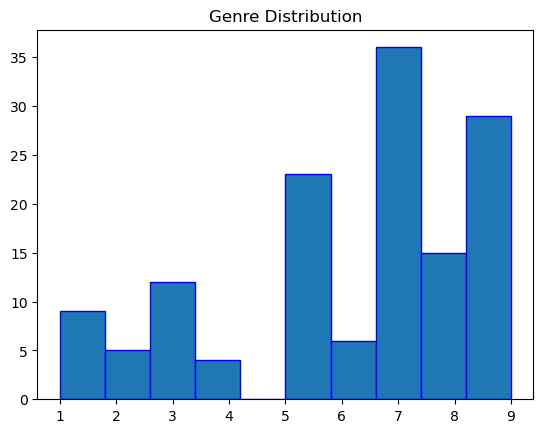

                           Genre.1
0   1 = Classical/Opera/Soundtrack
1                 2 = Country/Folk
2             3 = Electronic/Dance
3                   4 = Jazz/Vocal
4               5 = Pop/Mainstream
5                   6 = Rap/Hiphop
6  7 = Rock/Alternative/Metal/Punk
7          8 = R&B/Soul/Funk/Disco
8          9 = World/International


In [88]:
plt.hist(music_lib["Genre"].astype(int), bins = 10, ec = "b")
plt.title("Genre Distribution")
plt.show()
print(genre_lib)

# Feature Selection Based on Alpha

In [19]:
ratings = np.loadtxt("musicRatings.csv", delimiter=",")
ratings = ratings[:, :-1]
full_ratings = np.loadtxt("full_ratings.csv", delimiter=",")
full_ratings = full_ratings[:, :320]

(0.9848654525295165, array([0.983, 0.986]))

In [24]:
def getMaxDrop(df):
    return np.argmin([pg.cronbach_alpha(pd.DataFrame(df.drop(i, axis=1)))[0] for i in range(df.shape[1])])

In [26]:
drop_col = []

while full_ratings.shape[1] > 139:
    col_idx = getMaxDrop(pd.DataFrame(full_ratings))
    full_ratings = full_ratings[:, np.r_[:col_idx, col_idx+1:full_ratings.shape[1]]]
    drop_col.append(col_idx)
    print(col_idx)

260
273
17
163
88
41
27
279
264
235
264
276
83
271
75
86
87
269
233
152
220
263
237
63
256
85
259
78
243
39
80
73
200
206
78
80
23
144
27
199
77
207
236
244
75
36
21
139
233
212
33
75
68
250
54
242
62
156
126
9
143
210
201
21
233
57
243
134
205
62
226
242
41
55
36
215
113
205
121
33
125
32
17
153
38
198
16
24
202
51
159
54
23
163
217
47
218
79
199
44
181
10
155
0
175
98
24
27
80
149
154
41
97
81
188
28
20
84
185
7
146
158
125
179
68
158
22
181
29
100
10
86
150
159
138
87
43
6
1
34
125
77
152
22
18
24
31
78
7
152
69
145
1
52
150
133
94
61
17
24
0
59
140
66
110
63
86
122
23
109
110
5
11
104
56
5
17
118
125
106
106


In [27]:
music_lib = pd.read_excel('MusicTable.xlsx').iloc[:320, :8]
source_lib = pd.read_excel('MusicTable.xlsx').iloc[:6, [8]]
genre_lib = pd.read_excel('MusicTable.xlsx').iloc[:9, [9]]

In [28]:
for i in drop_col:
    music_lib = music_lib.drop(i).reset_index(drop=True)

In [29]:
music_lib.to_csv('new_select320_alpha.csv')

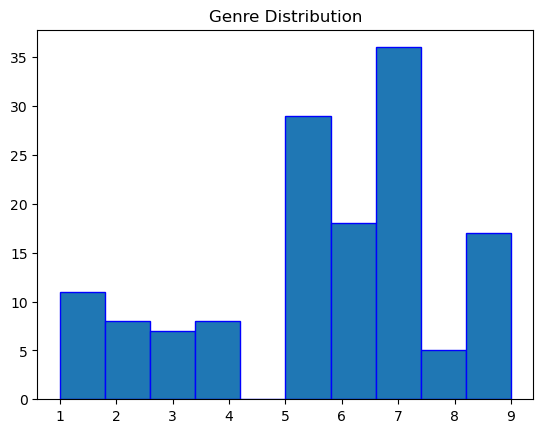

                           Genre.1
0   1 = Classical/Opera/Soundtrack
1                 2 = Country/Folk
2             3 = Electronic/Dance
3                   4 = Jazz/Vocal
4               5 = Pop/Mainstream
5                   6 = Rap/Hiphop
6  7 = Rock/Alternative/Metal/Punk
7          8 = R&B/Soul/Funk/Disco
8          9 = World/International


In [30]:
plt.hist(music_lib["Genre"].astype(int), bins = 10, ec = "b")
plt.title("Genre Distribution")
plt.show()
print(genre_lib)

# Compare

In [13]:
music_lib = pd.read_excel('MusicTable.xlsx').iloc[:, :8]
source_lib = pd.read_excel('MusicTable.xlsx').iloc[:6, [8]]
genre_lib = pd.read_excel('MusicTable.xlsx').iloc[:9, [9]]
music_lib.replace(' ', np.nan, inplace=True)
music_lib = music_lib.dropna()
vif = pd.read_csv("new_select320.csv")
alpha = pd.read_csv("new_select320_alpha.csv")

In [30]:
vif

,Unnamed: 0,Source,Number,Title,Artist,Genre,Subgenre/Style,Year,Clip name
0,0,1,1,Je Vous Pri Que J'Aye un Baysier,Richard Loqueville,1.0,Medieval,1418.0,0001_richardLoqueville_jeVousPriQueJAyeUnBaysi...
1,1,1,8,Man! I Feel Like a Woman!,Shania Twain,2.0,Country Rock,1997.0,0008_shaniaTwain_manIFeelLikeAWoman.mp4
2,2,1,10,Music Sounds Better With You,Stardust,3.0,House,1998.0,0010_stardust_musicSoundsBetterWithYou.mp4
3,3,1,11,Satisfaction,Benny Benassi,3.0,Techno,2002.0,0011_bennyBenassi_satisfaction.mp4
4,4,1,13,Feel It All Around,Washed Out,3.0,Downtempo,2009.0,0013_washedOut_feelItAllAround.mp4
...,...,...,...,...,...,...,...,...,...
134,134,4,314,Seinfeld Theme,Jonathan Wolff,9.0,TV,1989.0,0314_seinfeldTheme_jonathanWolff.mp4
135,135,4,315,Happy Days Theme,Norman Gimbel and Charles Fox,9.0,TV,1976.0,0315_happyDaysTheme_normalGimbelAndCharlesFox.mp4
136,136,4,316,Law and Order Theme,Mike Post,9.0,TV,1994.0,0316_lawAndOrderTheme_mikePost.mp4
137,137,4,317,Star Trek Original Series Theme,Alexander Courage,9.0,TV,1969.0,0317_starTrekTheme_alexandarCourage.mp4


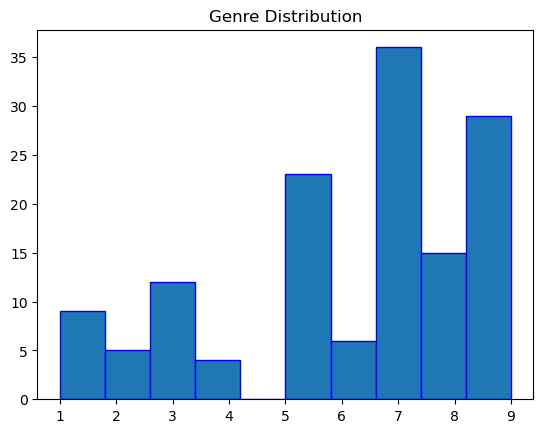

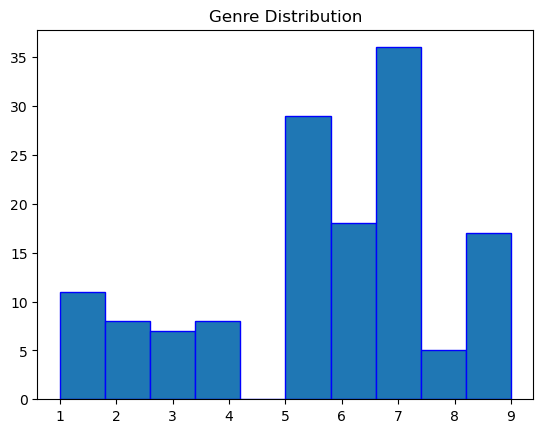

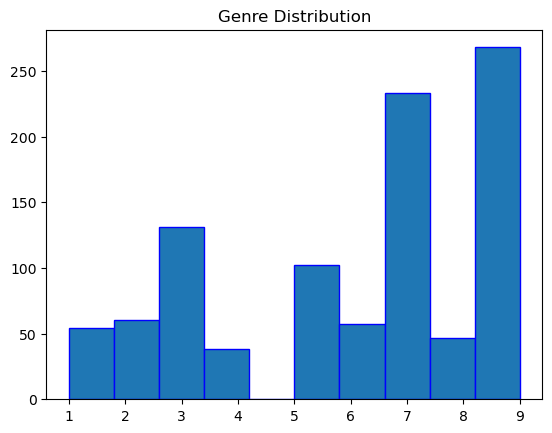

                           Genre.1
0   1 = Classical/Opera/Soundtrack
1                 2 = Country/Folk
2             3 = Electronic/Dance
3                   4 = Jazz/Vocal
4               5 = Pop/Mainstream
5                   6 = Rap/Hiphop
6  7 = Rock/Alternative/Metal/Punk
7          8 = R&B/Soul/Funk/Disco
8          9 = World/International


In [16]:
plt.hist(vif["Genre"].astype(int), bins = 10, ec = "b")
plt.title("Genre Distribution")
plt.show()

plt.hist(alpha["Genre"].astype(int), bins = 10, ec = "b")
plt.title("Genre Distribution")
plt.show()

plt.hist(music_lib["Genre"].astype(int), bins = 10, ec = "b")
plt.title("Genre Distribution")
plt.show()
print(genre_lib)

In [99]:
v_music_lib =  music_lib["Genre"].astype(int).value_counts().sort_index()
v_vif = vif["Genre"].astype(int).value_counts().sort_index()
v_alpha = alpha["Genre"].astype(int).value_counts().sort_index()

In [100]:
def jaccard_sim(l1, l2):
    return len(set(l1) & set(l2))/len(set(l1) | (set(l2)))

j_sim = jaccard_sim(vif["Number"].values, alpha["Number"].values)
j_sim

0.2694063926940639

In [101]:
for i in v_vif.index:
    v_vif[i] = v_vif[i]/v_music_lib[i]
    v_alpha[i] = v_alpha[i]/v_music_lib[i]

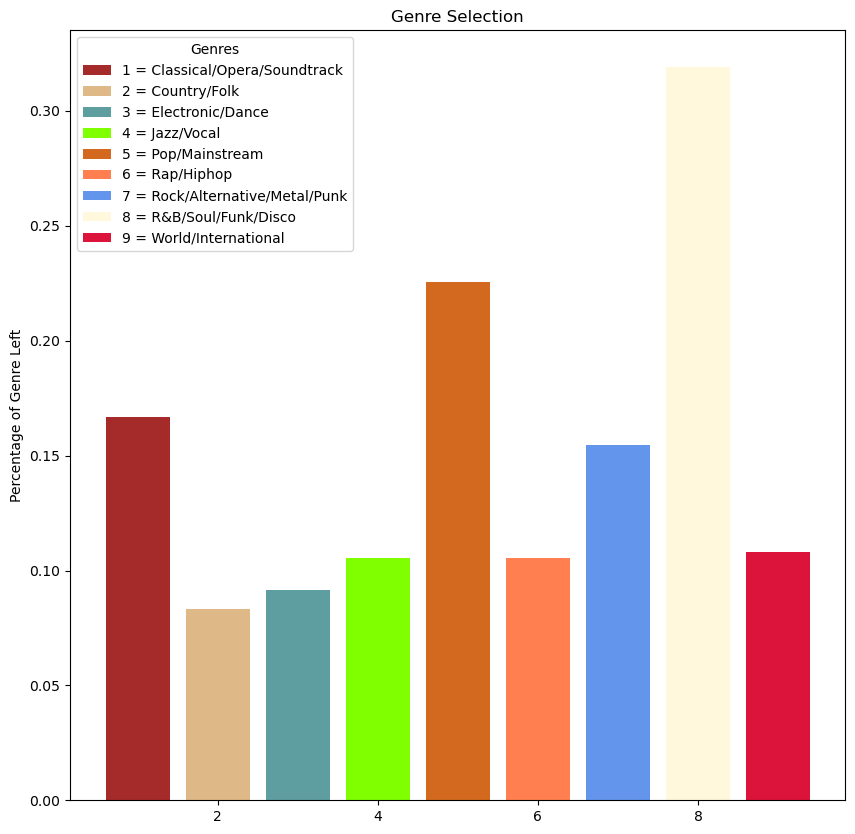

In [132]:
import matplotlib.colors as mcolors

named_colors = list(mcolors.CSS4_COLORS.keys())[9:]

fig, ax = plt.subplots(figsize=(10,10))

label = v_vif.index
counts = v_vif.values
bar_labels = [genre_lib.iloc[i-1,0] for i in v_vif.index]
named_colors = list(mcolors.CSS4_COLORS.keys())[11:20]

ax.bar(label, counts, label=bar_labels, color = named_colors)
ax.set_ylabel('Percentage of Genre Left')
ax.set_title('Genre Selection')
ax.legend(title='Genres')

plt.show()

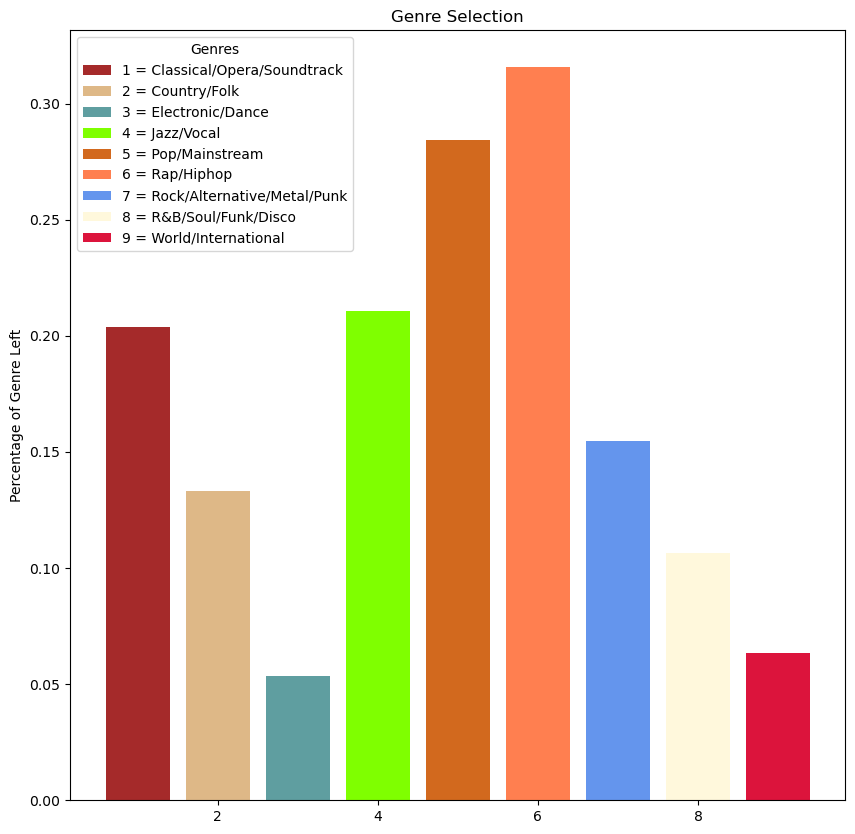

In [148]:
fig, ax = plt.subplots(figsize=(10,10))

label = v_alpha.index
counts = v_alpha.values
bar_labels = [genre_lib.iloc[i-1,0] for i in v_alpha.index]
named_colors = list(mcolors.CSS4_COLORS.keys())[11:20]

ax.bar(label, counts, label=bar_labels, color = named_colors)
ax.set_ylabel('Percentage of Genre Left')
ax.set_title('Genre Selection')
ax.legend(title='Genres')

plt.show()

In [146]:
j_list = [jaccard_sim(vif[vif["Genre"] == i]["Number"].values, 
                      alpha[alpha["Genre"] == i]["Number"].values) 
          for i in range(1,10)]

In [147]:
j_list

[0.42857142857142855,
 0.0,
 0.35714285714285715,
 0.2,
 0.2682926829268293,
 0.14285714285714285,
 0.3090909090909091,
 0.1111111111111111,
 0.3939393939393939]

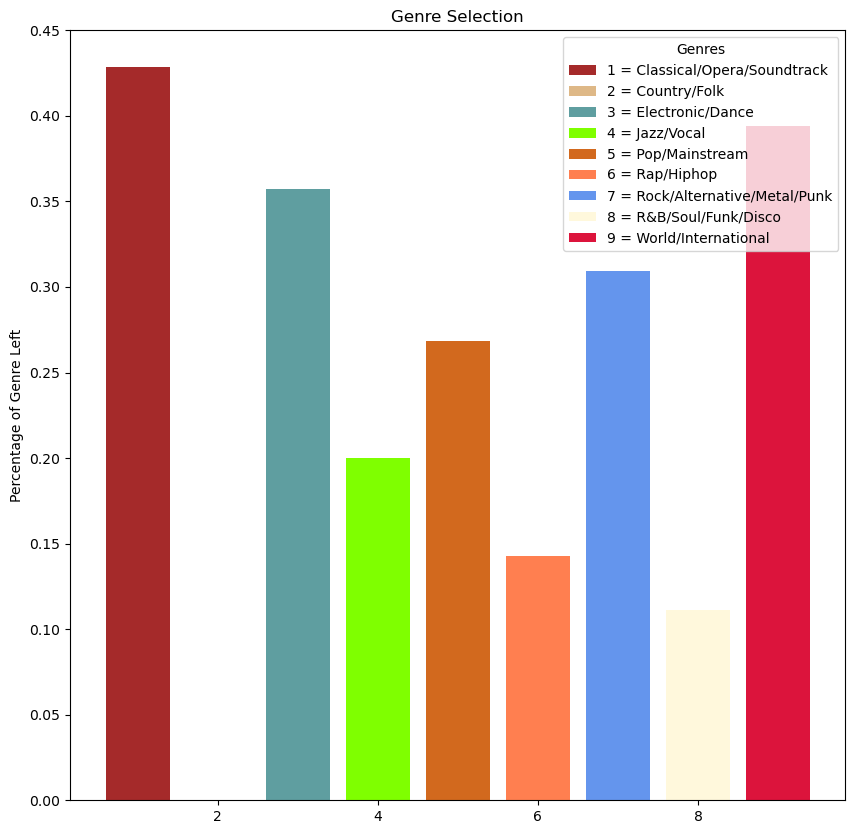

In [149]:
fig, ax = plt.subplots(figsize=(10,10))

label = v_alpha.index
counts = j_list
bar_labels = [genre_lib.iloc[i-1,0] for i in v_alpha.index]
named_colors = list(mcolors.CSS4_COLORS.keys())[11:20]

ax.bar(label, counts, label=bar_labels, color = named_colors)
ax.set_ylabel('Percentage of Genre Left')
ax.set_title('Genre Selection')
ax.legend(title='Genres')

plt.show()